In [ ]:
#!pip install probscale

# DESARROLLO MODELO RNA "Predicciones de leyes de mineral de Hierro"


Comando !pip freeze para cotillear a Google Colab

In [29]:
import os
import shutil
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow as tf
tf.__version__

'2.6.0'

# **CARGANDO EL CONJUNTO DE DATOS PROCESADOS Y LIMPIADOS**

In [79]:
import pandas as pd
import numpy as np
# Cargar los datos de las muestras de taladro
df = pd.read_csv('dataset_comp_coor.csv', sep=';')
original = pd.read_csv('dataset_comp_coor.csv', sep=';')
data1 = pd.read_csv('dataset_comp_coor.csv', sep=';')
df

,DDH,ESTE_X,NORTE_Y,COTA_Z,Fe,S,Cu,MET,Al,Sc,Ca,Y,Sr,Mg,Ba,K,Litologia,Lito_code
0,ODH-01,189710.521,8439045.693,3802.320,49.340,0.015,0.031625,0.134930,2.275,0.975,1.935,6.250,32.15,1.170,227.000,0.920,MG,5
1,ODH-01,189710.521,8439045.693,3797.820,50.565,0.008,0.026445,0.122810,1.880,0.250,2.265,4.250,17.85,1.860,243.500,0.650,MG,5
2,ODH-01,189710.521,8439045.693,3794.820,45.210,0.008,0.048940,0.149420,3.130,3.300,0.825,7.050,17.50,3.120,256.500,0.700,MG,5
3,ODH-01,189710.521,8439045.693,3791.820,48.920,0.160,0.059910,0.167215,2.640,4.675,0.710,7.450,28.25,1.950,149.500,0.685,MG,5
4,ODH-01,189710.521,8439045.693,3788.820,55.340,0.135,0.065140,0.136705,2.220,0.250,0.380,6.750,28.25,1.425,108.000,0.630,MG,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3557,ODH-99,189876.484,8439154.433,3639.536,46.055,4.415,0.177660,0.185555,1.975,2.675,3.585,6.350,52.60,2.015,89.500,0.935,MG,5
3558,ODH-99,189876.484,8439154.433,3636.886,16.584,1.671,0.059114,0.456623,5.544,14.613,5.667,11.091,218.07,3.964,179.652,2.174,INT,3
3559,ODH-99,189876.484,8439154.433,3626.236,5.520,2.990,0.026220,0.382200,5.440,12.900,8.670,17.000,480.00,4.840,197.000,2.550,SK,6
3560,ODH-99,189876.484,8439154.433,3614.236,9.890,5.530,0.037230,0.241000,3.260,6.600,9.180,7.700,175.00,4.960,85.000,2.380,SK,6


# **INSPECCION DEL CONJUNTO DE DATOS**

In [31]:
df.describe()

,ESTE_X,NORTE_Y,COTA_Z,Fe,S,Cu,MET,Al,Sc,Ca,Y,Sr,Mg,Ba,K,Lito_code
count,3562.000000,3.562000e+03,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.00000,3562.000000,3562.000000,3562.000000
mean,189653.259810,8.438982e+06,3623.483635,46.163388,2.524533,0.095366,0.145829,2.398209,2.864604,2.480691,7.124374,71.343670,1.88383,128.122668,0.936170,5.124368
std,231.636486,1.856955e+02,109.549222,17.956813,2.631182,0.092446,0.095178,1.962556,4.387746,2.675226,4.863706,116.321397,1.46419,184.309372,0.989339,0.682740
min,189077.490900,8.438584e+06,3231.404000,0.750000,0.005000,0.000140,0.027555,0.390000,0.250000,0.030000,0.700000,2.550000,0.00500,5.500000,0.030000,1.000000
25%,189493.629225,8.438822e+06,3561.475781,37.760000,0.250000,0.044512,0.082804,1.082750,0.250000,0.434250,4.000000,13.200000,0.86000,36.520500,0.260000,5.000000
50%,189738.100250,8.438992e+06,3653.512500,52.975000,2.560000,0.083655,0.113610,1.600000,0.425000,1.760000,5.650000,25.750000,1.48000,67.500000,0.563500,5.000000
75%,189846.775500,8.439133e+06,3701.501450,59.483750,3.765000,0.119883,0.174933,2.940750,3.880250,3.510000,8.600000,71.787500,2.51000,149.000000,1.230000,5.000000
max,190018.977800,8.439430e+06,3804.253340,68.970000,32.400000,1.765000,0.662680,12.220000,29.200000,15.000000,79.300000,1519.300000,15.00000,4412.000000,7.130000,7.000000


## Exploracion de la estructura del dataset.

In [32]:
# The folder names are our Classes
var_names = df.columns.to_list()
n_classes = len(var_names)
#print(df.columns.to_list())
print(f"Total Number of Variables : {n_classes}")
print(f"Variables : \n{var_names}")

Total Number of Variables : 18
Variables : 
['DDH', 'ESTE_X', 'NORTE_Y', 'COTA_Z', 'Fe', 'S', 'Cu', 'MET', 'Al', 'Sc', 'Ca', 'Y', 'Sr', 'Mg', 'Ba', 'K', 'Litologia', 'Lito_code']


In [33]:
clases_lito=df['Litologia'].unique()
names_lito = list(clases_lito)
names_lito

['MG', 'INT', 'FLL', 'SL', 'SK', 'CZ']

In [80]:
df.groupby('Litologia').size()

Litologia
CZ       18
FLL      17
INT      93
MAR      17
MG     2706
SK      653
SL       58
dtype: int64

## Observacion de la distribución de datos por litologia para comprender el desequilibrio en los datos.

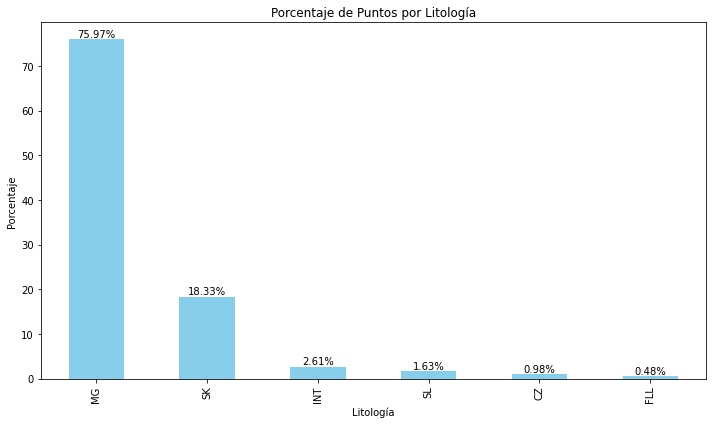

In [35]:
# Calcular el porcentaje de puntos por litología
porcentaje_litologia = (df['Litologia'].value_counts() / len(df)) * 100

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
porcentaje_litologia.plot(kind='bar', color='skyblue')

# Configurar el título y las etiquetas de los ejes
plt.title('Porcentaje de Puntos por Litología')
plt.xlabel('Litología')
plt.ylabel('Porcentaje')

# Mostrar el porcentaje en las barras
for i, v in enumerate(porcentaje_litologia):
    plt.text(i, v + 0.5, f'{v:.2f}%', ha='center')

# Mostrar el gráfico
plt.tight_layout()
plt.show()



# **AED**

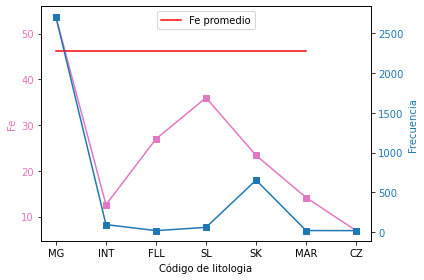

In [111]:
alte_1 = original[original["Litologia"]=='MG'];
alte_2 = original[original["Litologia"]=='INT'];
alte_3 = original[original["Litologia"]=='FLL'];
alte_4 = original[original["Litologia"]=='SL'];
alte_5 = original[original["Litologia"]=='SK'];
alte_6 = original[original["Litologia"]=='CZ'];
alte_7 = original[original["Litologia"]=='MAR']

#names_lito = ['MG', 'INT', 'FLL', 'SL', 'SK', 'CZ', 'MAR']
altes = [alte_1["Fe"].mean(), alte_2["Fe"].mean(), alte_3["Fe"].mean(),alte_4["Fe"].mean(),
         alte_5["Fe"].mean(),alte_6["Fe"].mean(),
         alte_7["Fe"].mean()
        ]
altes2 = [alte_1["Fe"].count(), alte_2["Fe"].count(),alte_3["Fe"].count(),alte_4["Fe"].count(),
          alte_5["Fe"].count(),alte_6["Fe"].count(),
          alte_7["Fe"].count()
         ]

t = names_lito
data11 = altes
data22 = altes2

fig, ax1 = plt.subplots()

color = 'tab:pink'
ax1.set_xlabel("Código de litologia")
ax1.set_ylabel('Fe', color=color)
ax1.plot(t, data11, 's-', color=color)
plt.plot([0,5],[original["Fe"].mean(),original["Fe"].mean()],color = 'red', label="Fe promedio")
plt.legend(loc='upper center')
plt.grid(False)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Frecuencia', color=color)
ax2.plot(t, data22, 's-', color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.grid(False)

fig.tight_layout()
plt.show()

In [112]:
stats_lito= original.groupby(["Litologia"]).describe() #estadísticas por codigo de litología
stats_lito["Fe"]

,count,mean,std,min,25%,50%,75%,max
Litologia,,,,,,,,
CZ,18.0,14.147056,18.230253,0.75,1.8650,3.69,29.84875,47.690
FLL,17.0,26.970176,18.964772,4.09,12.3200,24.18,41.28000,59.713
INT,93.0,12.576946,12.342144,1.89,4.5600,8.35,14.24000,56.930
MAR,17.0,6.914765,6.637594,1.09,2.2200,3.34,10.73000,20.910
MG,2706.0,53.616844,10.152480,1.49,49.1335,56.06,60.79375,68.970
SK,653.0,23.368899,16.255441,1.90,9.1900,18.86,34.42800,64.000
SL,58.0,35.975310,18.526476,3.72,19.9550,37.18,51.16375,66.530


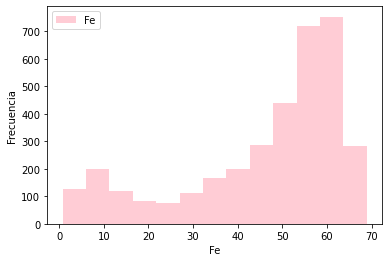

In [38]:
plt.hist(original["Fe"], color="pink", bins="sturges", histtype="barstacked", label="Fe", alpha=0.8)
plt.xlabel("Fe")
plt.ylabel("Frecuencia")
plt.grid(False)
plt.legend()
plt.show()

In [39]:
import plotly.express as px
fig = px.scatter_3d(original, x="ESTE_X", y="NORTE_Y",z="COTA_Z", color="Litologia",
#fig = px.scatter_3d(data_2022, x="X", y="Y",z="Z", color="MINTYPE_CODE",
                    color_continuous_scale=px.colors.sequential.Jet)
fig.update_traces(marker=dict(size=3))
fig.show()

In [40]:
fig = px.scatter_3d(original, x="ESTE_X", y="NORTE_Y",z="COTA_Z", color="Fe",
#fig = px.scatter_3d(data_2022, x="X", y="Y",z="Z", color="MINTYPE_CODE",
                    color_continuous_scale=px.colors.sequential.Jet)
fig.update_traces(marker=dict(size=3))
fig.show()

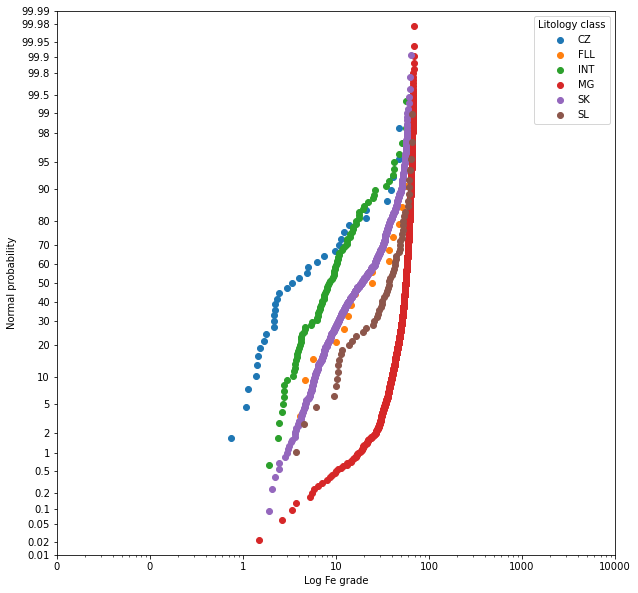

In [41]:
from matplotlib.ticker import ScalarFormatter
import probscale
fig, ax = plt.subplots(figsize=(10,10))
for category in original.groupby("Litologia").groups.keys():
    xData = original.groupby("Litologia").get_group(category)["Fe"].sort_values()
    probscale.probplot(xData, ax=ax, probax="y", datascale="log",label=category)
ax.legend(title="Litology class")
ax.set_ylim(bottom=0.01, top=99.99)
ax.set_xlim(left=0.01, right=1e4)
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
ax.set_xlabel("Log Fe grade")
ax.set_ylabel("Normal probability")
ax.set_title("")
plt.show()

In [42]:
data1["Litologia"]

0        MG
1        MG
2        MG
3        MG
4        MG
       ... 
3557     MG
3558    INT
3559     SK
3560     SK
3561     SK
Name: Litologia, Length: 3562, dtype: object

In [43]:
clases_lito=df['Litologia'].unique()
names_lito = list(clases_lito)
names_lito.sort()
names_lito

['CZ', 'FLL', 'INT', 'MG', 'SK', 'SL']

In [44]:

# Codificacion nueméria de los nombres de las etiquetas  entre 0 y 6
from sklearn.preprocessing import LabelEncoder
# codificando nuemericamente las etiquetas categoricas
le = LabelEncoder()
y_train = le.fit_transform(data1["Lito_code"])
print(y_train)
#lito_code=pd.DataFrame(y_train, columns=['Lito_code'])
#lito_code

[4 4 4 ... 5 5 5]


In [46]:
s = data1["Lito_code"] #transformación de atributo categorico a conjunto de atributos binarios
data2 = pd.get_dummies(s).astype(int)

# Ordena las columnas alfabéticamente por nombre
#data2 = data2.sort_index(axis=1)
names_lito.sort()
# Cambia los nombres de las columnas
data2.columns = names_lito
# Guardar el DataFrame fusionado en un nuevo archivo CSV
data2.to_csv('dummies_sorted.csv', index=False, encoding='utf-8')
data2.head()

ValueError: Length mismatch: Expected axis has 7 elements, new values have 6 elements

In [49]:
data1.drop(["DDH","Litologia","Lito_code"], axis=1, inplace=True)
data1.head()

,ESTE_X,NORTE_Y,COTA_Z,Fe,S,Cu,MET,Al,Sc,Ca,Y,Sr,Mg,Ba,K
0,189710.521,8439045.693,3802.32,49.340,0.015,0.031625,0.134930,2.275,0.975,1.935,6.25,32.15,1.170,227.0,0.920
1,189710.521,8439045.693,3797.82,50.565,0.008,0.026445,0.122810,1.880,0.250,2.265,4.25,17.85,1.860,243.5,0.650
2,189710.521,8439045.693,3794.82,45.210,0.008,0.048940,0.149420,3.130,3.300,0.825,7.05,17.50,3.120,256.5,0.700
3,189710.521,8439045.693,3791.82,48.920,0.160,0.059910,0.167215,2.640,4.675,0.710,7.45,28.25,1.950,149.5,0.685
4,189710.521,8439045.693,3788.82,55.340,0.135,0.065140,0.136705,2.220,0.250,0.380,6.75,28.25,1.425,108.0,0.630


In [22]:
df_concat = pd.concat([data1,data2], axis=1)
df_concat

NameError: name 'data2' is not defined

In [21]:
df_concat.describe().T

NameError: name 'df_concat' is not defined

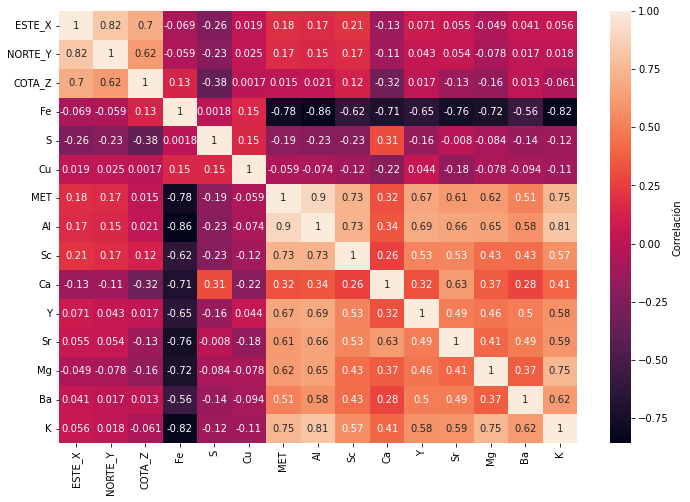

In [50]:
import seaborn as sn
plt.subplot(111)
sn.heatmap(data1.corr(method='pearson'), annot=True, cbar_kws={'label': 'Correlación'})
plt.subplots_adjust(left=0, bottom=0, right=1.5, top=1.5)
plt.show()

## Seleccion y Division de Variables Predictoras y Objetivo


In [52]:
df

,DDH,ESTE_X,NORTE_Y,COTA_Z,Fe,S,Cu,MET,Al,Sc,Ca,Y,Sr,Mg,Ba,K,Litologia,Lito_code
0,ODH-01,189710.521,8439045.693,3802.320,49.340,0.015,0.031625,0.134930,2.275,0.975,1.935,6.250,32.15,1.170,227.000,0.920,MG,5
1,ODH-01,189710.521,8439045.693,3797.820,50.565,0.008,0.026445,0.122810,1.880,0.250,2.265,4.250,17.85,1.860,243.500,0.650,MG,5
2,ODH-01,189710.521,8439045.693,3794.820,45.210,0.008,0.048940,0.149420,3.130,3.300,0.825,7.050,17.50,3.120,256.500,0.700,MG,5
3,ODH-01,189710.521,8439045.693,3791.820,48.920,0.160,0.059910,0.167215,2.640,4.675,0.710,7.450,28.25,1.950,149.500,0.685,MG,5
4,ODH-01,189710.521,8439045.693,3788.820,55.340,0.135,0.065140,0.136705,2.220,0.250,0.380,6.750,28.25,1.425,108.000,0.630,MG,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3557,ODH-99,189876.484,8439154.433,3639.536,46.055,4.415,0.177660,0.185555,1.975,2.675,3.585,6.350,52.60,2.015,89.500,0.935,MG,5
3558,ODH-99,189876.484,8439154.433,3636.886,16.584,1.671,0.059114,0.456623,5.544,14.613,5.667,11.091,218.07,3.964,179.652,2.174,INT,3
3559,ODH-99,189876.484,8439154.433,3626.236,5.520,2.990,0.026220,0.382200,5.440,12.900,8.670,17.000,480.00,4.840,197.000,2.550,SK,6
3560,ODH-99,189876.484,8439154.433,3614.236,9.890,5.530,0.037230,0.241000,3.260,6.600,9.180,7.700,175.00,4.960,85.000,2.380,SK,6


In [81]:
df_predictoras = pd.concat([df.iloc[:,1:4],df.iloc[:,-10:-2],df.iloc[:,-1:]],axis=1)
var_names_predict = df_predictoras.columns.to_list()
var_names_predict

['ESTE_X',
 'NORTE_Y',
 'COTA_Z',
 'Al',
 'Sc',
 'Ca',
 'Y',
 'Sr',
 'Mg',
 'Ba',
 'K',
 'Lito_code']

In [82]:
df_objetivo =df.iloc[:, 4:8]
var_names_objetivo = df_objetivo.columns.to_list()
var_names_objetivo

['Fe', 'S', 'Cu', 'MET']

In [98]:
# The folder names are our Classes
dataset_train = train_df.drop(['DDH','Litologia','Lito_code'],axis=1)
var_names = dataset_train.columns.to_list()
n_dim = len(var_names)
#print(df.columns.to_list())
print(f"Total Number of Variables : {n_dim}")
print(f"Variables : \n{var_names}")

Total Number of Variables : 15
Variables : 
['ESTE_X', 'NORTE_Y', 'COTA_Z', 'Fe', 'S', 'Cu', 'MET', 'Al', 'Sc', 'Ca', 'Y', 'Sr', 'Mg', 'Ba', 'K']


In [109]:
num_neuronas_salida = df_predictoras.shape[1]
num_neuronas = df_objetivo.shape[1]
print("num_neuronas_salida: ",num_neuronas_salida,"\n", "num_neuronas: ",num_neuronas)

num_neuronas_salida:  12 
 num_neuronas:  4


In [110]:
clases_lito=df['Litologia'].unique()
names_lito = list(clases_lito)
names_lito

['MG', 'INT', 'FLL', 'SL', 'SK', 'MAR', 'CZ']

# **CONSTRUCCION DE LA TOPOLOGIA DE RED NEURONAL (RNA) Y ENTRENANDOLA**

In [51]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import KFold
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping


# VALIDACION CRUZADA

## Construccion del modelo

In [61]:
tf.keras.backend.clear_session()

num_neuronas = df_predictoras.shape[1] #número de entradas
num_neuronas_salida = df_objetivo.shape[1]# Indicar tantas neuronas de salida como clases a predecir, en este caso 3

network = models.Sequential()
network.add(layers.Dense(num_neuronas*10, activation='relu', input_shape=df_predictoras.shape[1:]))
network.add(layers.BatchNormalization())
network.add(layers.Dense(num_neuronas*5, activation='relu',
                         kernel_initializer='he_normal'
                        )
           )
network.add(layers.Dense(32, activation='relu',
                         kernel_initializer='he_normal'
                       )
          )
network.add(layers.BatchNormalization())
network.add(layers.Dense(num_neuronas_salida)) #la última capa no tiene función de activación cuando se trata de regresión

# Definir el callback para reducir el learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
callbacks = [reduce_lr, early_stop]

# Resumen de las capas del modelo
network.summary()

# Compilacion del modelo
optimizer = RMSprop(learning_rate=0.01)
network.compile(
   loss = 'mean_squared_error', 
   optimizer = optimizer
    #metrics=['mae']
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 120)               1560      
_________________________________________________________________
batch_normalization (BatchNo (None, 120)               480       
_________________________________________________________________
dense_1 (Dense)              (None, 60)                7260      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1952      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 132       
Total params: 11,512
Trainable params: 11,208
Non-trainable params: 304
__________________________________________________

In [89]:


# Define el número de divisiones (folds) para la validación cruzada
n_splits = 20  # Puedes ajustar este valor según tus necesidades

# Crea un objeto KFold para dividir los datos
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Listas para almacenar los resultados de cada fold
r2_scores = []
mae_scores = []
mse_scores = []
X = df_predictoras
y = df_objetivo
# Itera a través de las divisiones de la validación cruzada
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Escala los datos de entrenamiento y prueba
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Entrena el modelo con X_train_scaled y y_train
    #Entrenamiento del modelo
    history = network.fit(X_train_scaled, 
                          y_train, 
                          epochs=1000, 
                          batch_size = 18,
                          validation_data=(X_test_scaled, y_test),
                          verbose=1,
                          callbacks=callbacks
                         )

    # Realiza predicciones en el conjunto de prueba
    y_pred = network.predict(X_test_scaled)

    # Calcula las métricas para este fold
    r2 = metrics.r2_score(y_test, y_pred)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    # Almacena los resultados en las listas
    r2_scores.append(r2)
    mae_scores.append(mae)
    mse_scores.append(mse)

# Calcula el promedio de las métricas en todos los folds
avg_r2 = np.mean(r2_scores)
avg_mae = np.mean(mae_scores)
avg_mse = np.mean(mse_scores)

# Imprime los resultados finales
print("Promedio de R^2:", avg_r2)
print("Promedio de MAE:", avg_mae)
print("Promedio de MSE:", avg_mse)

Epoch 1/1000
188/188 [==============================] - 1s 5ms/step - loss: 7.5382 - val_loss: 3.3206
Epoch 2/1000
188/188 [==============================] - 1s 5ms/step - loss: 6.8856 - val_loss: 3.3009
Epoch 3/1000
188/188 [==============================] - 1s 5ms/step - loss: 7.4601 - val_loss: 3.3076
Epoch 4/1000
188/188 [==============================] - 1s 5ms/step - loss: 7.3255 - val_loss: 3.3087
Epoch 5/1000
188/188 [==============================] - 1s 5ms/step - loss: 7.5261 - val_loss: 3.3093
Epoch 6/1000
188/188 [==============================] - 1s 5ms/step - loss: 6.8745 - val_loss: 3.2990
Epoch 7/1000
188/188 [==============================] - 1s 5ms/step - loss: 7.7713 - val_loss: 3.3803
Epoch 8/1000
188/188 [==============================] - 1s 5ms/step - loss: 7.2548 - val_loss: 3.3234
Epoch 9/1000
188/188 [==============================] - 1s 5ms/step - loss: 7.1659 - val_loss: 3.3015
Epoch 10/1000
188/188 [==============================] - 1s 5ms/step - loss: 7.906

Epoch 11/1000
188/188 [==============================] - 1s 4ms/step - loss: 6.8697 - val_loss: 1.7377
Epoch 12/1000
188/188 [==============================] - 1s 4ms/step - loss: 7.3633 - val_loss: 1.7412
Epoch 13/1000
188/188 [==============================] - 1s 4ms/step - loss: 8.0193 - val_loss: 1.7245
Epoch 14/1000
188/188 [==============================] - 1s 4ms/step - loss: 7.8842 - val_loss: 1.7597
Epoch 15/1000
188/188 [==============================] - 1s 4ms/step - loss: 7.9940 - val_loss: 1.7211
Epoch 16/1000
188/188 [==============================] - 1s 4ms/step - loss: 7.6110 - val_loss: 1.7654
Epoch 17/1000
188/188 [==============================] - 1s 4ms/step - loss: 7.3724 - val_loss: 1.7520
Epoch 18/1000
188/188 [==============================] - 1s 4ms/step - loss: 7.5331 - val_loss: 1.7671
Epoch 19/1000
188/188 [==============================] - 1s 4ms/step - loss: 7.8772 - val_loss: 1.7965
Epoch 20/1000
188/188 [==============================] - 1s 4ms/step - lo

Epoch 3/1000
188/188 [==============================] - 1s 4ms/step - loss: 8.0118 - val_loss: 2.2824
Epoch 4/1000
188/188 [==============================] - 1s 4ms/step - loss: 7.9149 - val_loss: 2.4381
Epoch 5/1000
188/188 [==============================] - 1s 4ms/step - loss: 7.8550 - val_loss: 2.3338
Epoch 6/1000
188/188 [==============================] - 1s 4ms/step - loss: 7.4445 - val_loss: 2.4089
Epoch 7/1000
188/188 [==============================] - 1s 4ms/step - loss: 6.8408 - val_loss: 2.3250
Epoch 8/1000
188/188 [==============================] - 1s 4ms/step - loss: 7.2698 - val_loss: 2.3641
Epoch 9/1000
188/188 [==============================] - 1s 4ms/step - loss: 6.9895 - val_loss: 2.3661
Epoch 10/1000
188/188 [==============================] - 1s 5ms/step - loss: 7.2384 - val_loss: 2.4379
Epoch 11/1000
188/188 [==============================] - 1s 4ms/step - loss: 7.3309 - val_loss: 2.4181
Epoch 12/1000
188/188 [==============================] - 1s 4ms/step - loss: 6.9

Epoch 15/1000
188/188 [==============================] - 1s 4ms/step - loss: 7.4913 - val_loss: 1.5073
Epoch 16/1000
188/188 [==============================] - 1s 4ms/step - loss: 7.6078 - val_loss: 1.4982
Epoch 17/1000
188/188 [==============================] - 1s 4ms/step - loss: 7.4898 - val_loss: 1.5123
Epoch 18/1000
188/188 [==============================] - 1s 4ms/step - loss: 7.1347 - val_loss: 1.5139
Epoch 19/1000
188/188 [==============================] - 1s 4ms/step - loss: 7.3424 - val_loss: 1.5260
Epoch 20/1000
188/188 [==============================] - 1s 4ms/step - loss: 6.6647 - val_loss: 1.5337
Epoch 21/1000
188/188 [==============================] - 1s 4ms/step - loss: 6.3990 - val_loss: 1.6025
Epoch 22/1000
188/188 [==============================] - 1s 4ms/step - loss: 7.2938 - val_loss: 1.5525
Epoch 23/1000
188/188 [==============================] - 1s 5ms/step - loss: 6.4330 - val_loss: 1.5855
Epoch 24/1000
188/188 [==============================] - 1s 4ms/step - lo

Epoch 20/1000
188/188 [==============================] - 1s 4ms/step - loss: 7.0680 - val_loss: 2.1105
Epoch 21/1000
188/188 [==============================] - 1s 4ms/step - loss: 8.1253 - val_loss: 2.0840
Epoch 22/1000
188/188 [==============================] - 1s 4ms/step - loss: 7.4240 - val_loss: 2.0737
Epoch 23/1000
188/188 [==============================] - 1s 4ms/step - loss: 7.1487 - val_loss: 2.1004
Epoch 24/1000
188/188 [==============================] - 1s 4ms/step - loss: 6.6065 - val_loss: 2.1348
Epoch 25/1000
188/188 [==============================] - 1s 4ms/step - loss: 7.1449 - val_loss: 2.0642
Epoch 26/1000
188/188 [==============================] - 1s 4ms/step - loss: 6.7806 - val_loss: 2.0858
Epoch 27/1000
188/188 [==============================] - 1s 4ms/step - loss: 7.6438 - val_loss: 2.1453
Epoch 28/1000
188/188 [==============================] - 1s 4ms/step - loss: 7.3800 - val_loss: 2.2237
Epoch 29/1000
188/188 [==============================] - 1s 4ms/step - lo

Epoch 8/1000
188/188 [==============================] - 1s 4ms/step - loss: 7.2455 - val_loss: 2.0378
Epoch 9/1000
188/188 [==============================] - 1s 4ms/step - loss: 7.7743 - val_loss: 2.0723
Epoch 10/1000
188/188 [==============================] - 1s 4ms/step - loss: 6.9681 - val_loss: 2.0243
Epoch 11/1000
188/188 [==============================] - 1s 4ms/step - loss: 6.8145 - val_loss: 1.9968
Epoch 12/1000
188/188 [==============================] - 1s 4ms/step - loss: 7.2838 - val_loss: 2.0116
Epoch 13/1000
188/188 [==============================] - 1s 4ms/step - loss: 6.9994 - val_loss: 2.0243
Epoch 14/1000
188/188 [==============================] - 1s 4ms/step - loss: 6.5845 - val_loss: 2.0022
Epoch 15/1000
188/188 [==============================] - 1s 4ms/step - loss: 8.1791 - val_loss: 2.0167
Epoch 16/1000
188/188 [==============================] - 1s 4ms/step - loss: 6.5385 - val_loss: 2.0203
Epoch 17/1000
188/188 [==============================] - 1s 4ms/step - loss

Epoch 19/1000
188/188 [==============================] - 1s 4ms/step - loss: 6.6445 - val_loss: 4.1216
Epoch 20/1000
188/188 [==============================] - 1s 4ms/step - loss: 7.5096 - val_loss: 4.0577
Epoch 21/1000
188/188 [==============================] - 1s 4ms/step - loss: 7.0596 - val_loss: 4.0540
Promedio de R^2: 0.5937829655719434
Promedio de MAE: 0.7449118502589628
Promedio de MSE: 2.710554576312795


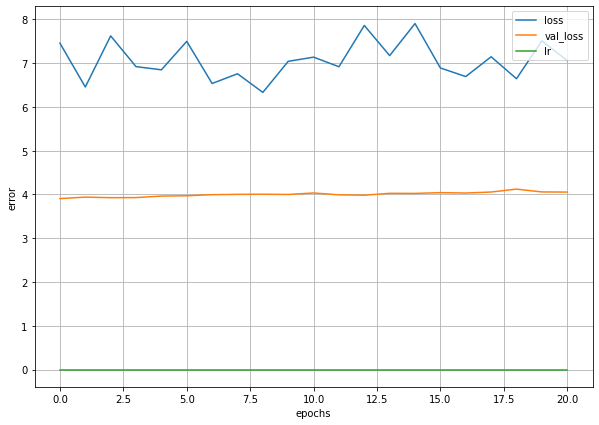

Correlación (R): 0.9958358290391942
Coeficiente de Determinación (R^2): 0.6182707524907834
Error Absoluto Medio (MAE): 0.7883889936420336
Error Cuadrático Medio (MSE): 3.9053693022451745


In [115]:
# Grafica de las metricas
pd.DataFrame(history.history).plot(figsize=(10, 7))
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("error")
plt.show()

#Evaluacion del modelo
# Predecir sobre los datos de prueba
y_pred = network.predict(X_test_scaled)

# Calcular la correlación (R)
correlation = np.corrcoef(y_pred.flatten(), y_test.values.flatten())[0, 1]
print("Correlación (R):", correlation)

# Calcular el coeficiente de determinación (R^2)
r2 = metrics.r2_score(y_test, y_pred)
print("Coeficiente de Determinación (R^2):", r2)

# Calcular el error absoluto medio (MAE)
mae = metrics.mean_absolute_error(y_test, y_pred)
print("Error Absoluto Medio (MAE):", mae)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error Cuadrático Medio (MSE):", mse)

In [116]:
r2_scores

[0.5981595041022356,
 0.5380993003994988,
 0.5829144471679404,
 0.6543097905988522,
 0.6009705249509685,
 0.6448709351651121,
 0.6183852462277419,
 0.5837573258655704,
 0.6072922255256863,
 0.6129709373756909,
 0.6307824370261055,
 0.64037454362254,
 0.5639387506827417,
 0.6156770345849811,
 0.5087132497592755,
 0.5051986134605246,
 0.593957329166462,
 0.6134123105132853,
 0.5436040527528729,
 0.6182707524907834]

## Validacion por variable a predecir

In [91]:
# Supongamos que tienes tus predicciones en 'y_pred' y los valores reales en 'y_test'

variables = ['Fe', 'Cu', 'S', 'MET']  # Nombres de las variables objetivo

for i, variable in enumerate(variables):
    y_test_variable = y_test.iloc[:, i]
    y_pred_variable = y_pred[:, i]

    # Calcula la correlación (R)
    correlation = np.corrcoef(y_pred_variable, y_test_variable)[0, 1]

    # Calcula el coeficiente de determinación (R^2)
    r2 = r2_score(y_test_variable, y_pred_variable)

    # Calcula el error absoluto medio (MAE)
    mae = mean_absolute_error(y_test_variable, y_pred_variable)

    # Calcula el error cuadrático medio (MSE)
    mse = mean_squared_error(y_test_variable, y_pred_variable)

    # Muestra las métricas para la variable actual
    print(f"Variable: {variable}")
    print(f"Correlación (R): {correlation}")
    print(f"Coeficiente de Determinación (R^2): {r2}")
    print(f"Error Absoluto Medio (MAE): {mae}")
    print(f"Error Cuadrático Medio (MSE): {mse}")
    print("-" * 40)  # Separador

Variable: Fe
Correlación (R): 0.9812162995620257
Coeficiente de Determinación (R^2): 0.9622636025246547
Error Absoluto Medio (MAE): 2.099617806573932
Error Cuadrático Medio (MSE): 13.695907413285864
----------------------------------------
Variable: Cu
Correlación (R): 0.8530609968394909
Coeficiente de Determinación (R^2): 0.724325576061641
Error Absoluto Medio (MAE): 0.9746566002931489
Error Cuadrático Medio (MSE): 1.918818341362724
----------------------------------------
Variable: S
Correlación (R): 0.36592171662797685
Coeficiente de Determinación (R^2): 0.027495898642976524
Error Absoluto Medio (MAE): 0.045099720126300986
Error Cuadrático Medio (MSE): 0.004489125055926428
----------------------------------------
Variable: MET
Correlación (R): 0.8763659558907759
Coeficiente de Determinación (R^2): 0.7589979327338615
Error Absoluto Medio (MAE): 0.03418184757475384
Error Cuadrático Medio (MSE): 0.002262329276189948
----------------------------------------


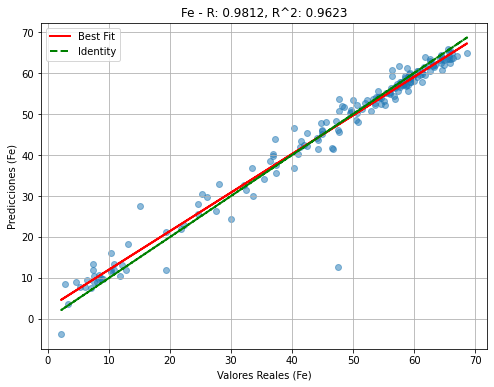

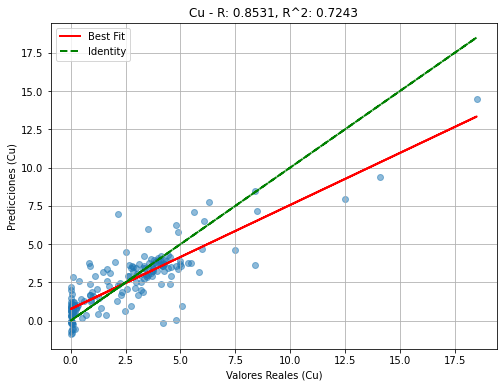

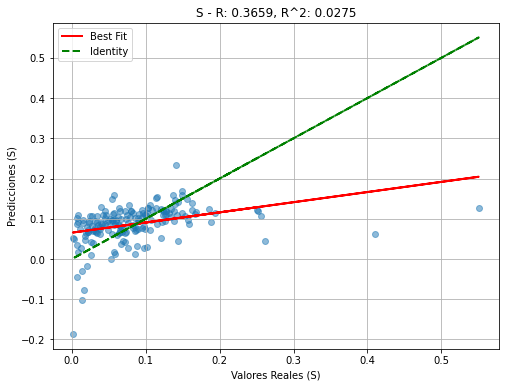

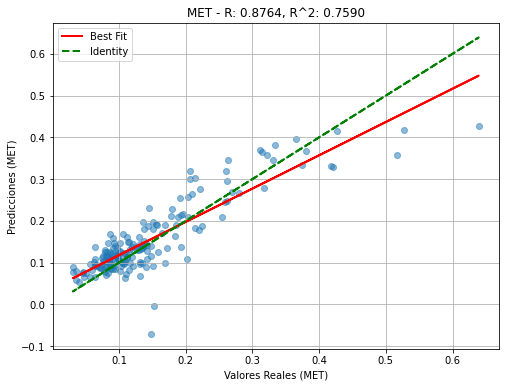

In [93]:
# predicciones en 'y_pred' y los valores reales en 'y_test'

variables = ['Fe', 'Cu', 'S', 'MET']  # Nombres de las variables objetivo

for i, variable in enumerate(variables):
    y_test_variable = y_test.iloc[:, i]
    y_pred_variable = y_pred[:, i]

    # Calcula la correlación (R)
    correlation = np.corrcoef(y_pred_variable, y_test_variable)[0, 1]

    # Calcula el coeficiente de determinación (R^2)
    r2 = r2_score(y_test_variable, y_pred_variable)

    # Calcula el error absoluto medio (MAE)
    mae = mean_absolute_error(y_test_variable, y_pred_variable)

    # Calcula el error cuadrático medio (MSE)
    mse = mean_squared_error(y_test_variable, y_pred_variable)

    # Crea el gráfico de dispersión con las métricas
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test_variable, y_pred_variable, alpha=0.5)
    plt.xlabel(f"Valores Reales ({variable})")
    plt.ylabel(f"Predicciones ({variable})")
    plt.title(f"{variable} - R: {correlation:.4f}, R^2: {r2:.4f}")
    slope, intercept = np.polyfit(y_test_variable, y_pred_variable, 1)
    plt.plot(y_test_variable, slope * y_test_variable + intercept, color='red', linewidth=2, label='Best Fit')
    plt.plot(y_test_variable, y_test_variable, color='green', linestyle='--', linewidth=2, label='Identity')
    plt.legend()
    plt.grid(True)
    plt.show()


In [94]:


# Supongamos que tienes tus predicciones en 'y_pred' y los valores reales en 'y_test'

variables = ['Fe', 'Cu', 'S', 'MET']  # Nombres de las variables objetivo
metrics_data = []

for i, variable in enumerate(variables):
    y_test_variable = y_test.iloc[:, i]
    y_pred_variable = y_pred[:, i]

    # Calcula la correlación (R)
    correlation = np.corrcoef(y_pred_variable, y_test_variable)[0, 1]

    # Calcula el coeficiente de determinación (R^2)
    r2 = r2_score(y_test_variable, y_pred_variable)

    # Calcula el error absoluto medio (MAE)
    mae = mean_absolute_error(y_test_variable, y_pred_variable)

    # Calcula el error cuadrático medio (MSE)
    mse = mean_squared_error(y_test_variable, y_pred_variable)

    # Calcula el Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)

    # Agrega las métricas a la lista
    metrics_data.append([variable, correlation, r2, mae, mse, rmse])

# Crea un DataFrame con los resultados
metrics_df = pd.DataFrame(metrics_data, columns=['Variable', 'Correlación (R)', 'Coeficiente de Determinación (R^2)', 'Error Absoluto Medio (MAE)', 'Error Cuadrático Medio (MSE)', 'Root Mean Squared Error (RMSE)'])

# Establece la columna 'Variable' como índice
metrics_df.set_index('Variable', inplace=True)

# Muestra el cuadro de métricas sin el índice numérico
metrics_df


,Correlación (R),Coeficiente de Determinación (R^2),Error Absoluto Medio (MAE),Error Cuadrático Medio (MSE),Root Mean Squared Error (RMSE)
Variable,,,,,
Fe,0.981216,0.962264,2.099618,13.695907,3.700798
Cu,0.853061,0.724326,0.974657,1.918818,1.385214
S,0.365922,0.027496,0.045100,0.004489,0.067001
MET,0.876366,0.758998,0.034182,0.002262,0.047564


# **Guardando modelo**

In [117]:
# Importa las bibliotecas necesarias
import h5py

# Guarda el modelo en un archivo ".h5"
network.save('modelo_Fe_RNA_Kfold.h5')

print("Modelo guardado correctamente en 'modelo_Fe_RNA_Kfold.h5'")

# Para cargar el modelo posteriormente:
#modelo_cargado = load_model('modelo_Fe_RNA_Kfold.h5')

Modelo guardado correctamente en 'modelo_de_red_neuronal.h5'


In [ ]:
%%capture
!sudo apt install texlive-full

In [ ]:
%%capture
name_IPYNB_file = '/12MBID10_YépezCallo_JuanCarlos.ipynb'
get_ipython().system(
    "apt update >> /dev/null && apt install texlive-xetex texlive-fonts-recommended texlive-generic-recommended -y >> /dev/null"
)
get_ipython().system(
    f"jupyter nbconvert --output-dir='{BASE_FOLDER}' '{BASE_FOLDER}{name_IPYNB_file}' --to pdf"
)